### Memuat Data Boiler

Sebelum menjalankan kode, data harus diunggah ke dalam Google Colab terlebih dahulu.

In [0]:
import pandas as pd #Mengimpor pustaka pandas
import numpy as np #Mengimpor pustaka numpy
import tensorflow as tf #Mengimpor pustaka tensorflow
from tensorflow import keras #Mengimpor pustaka keras
from tensorflow.keras import layers #Mengimpor fungsi layer pada pustaka keras

data = pd.read_csv("test.csv", sep=";") #membaca dan memuat data dari file test.csv

data.head()

,Deaerator6Level,BfwFlowToSuperheater,SteamDesuperheaterCont,BoilerFeedWater,MainGasInletToFurnace,FuelGasBehindCv,CombustionAirFlow,AirBurnerBox,MainSteamTemperature,FlueGasFurnace,Boiler6FlueGasOutlet,SteamBoiler,WindBoxPressure,CombustionAir,Boiler6SteamDrum,MainSteamHeader,EconomizerWaterInlet,EconomizerWaterOutlet,O2Content
0,73.833286,2878.261279,385.089943,73480.63145,4990.783449,0.205181,90227.57088,191.485891,465.016393,126.163092,380.296525,60.603667,164.637920,41.696390,35.146416,74531.61886,127.565901,204.433856,2.819320
1,74.034338,2915.729642,384.941264,73335.77750,4993.540673,0.205146,90541.08777,194.214289,465.010750,125.341981,380.502482,60.543705,164.494827,39.827070,35.071969,74209.44911,125.919225,203.944070,2.890382
2,74.265272,2923.531387,384.879958,73254.20730,4995.837888,0.205098,90766.57889,191.068990,465.012763,127.680386,380.569313,60.517073,164.050287,40.087145,35.035882,74216.97196,125.275447,203.372497,2.896828
3,73.791472,2929.040084,385.137359,73544.81138,4993.856938,0.205290,90967.69117,193.446918,464.997549,122.609493,381.001274,60.554271,164.333143,39.799208,35.048462,74403.69135,127.290542,204.706366,2.944402
4,73.816527,2898.786333,385.228053,73397.35887,4997.007632,0.205069,91530.15929,191.624351,464.990651,121.592184,380.955237,60.477275,164.523739,39.351849,34.971700,74470.67353,127.715948,205.071043,2.942352


### Mengecek dan Menghilangkan missing value

In [0]:
data.isna().sum() #mengecek missing value

Deaerator6Level           0
BfwFlowToSuperheater      0
SteamDesuperheaterCont    0
BoilerFeedWater           0
MainGasInletToFurnace     0
FuelGasBehindCv           0
CombustionAirFlow         0
AirBurnerBox              0
MainSteamTemperature      0
FlueGasFurnace            0
Boiler6FlueGasOutlet      0
SteamBoiler               0
WindBoxPressure           0
CombustionAir             0
Boiler6SteamDrum          0
MainSteamHeader           0
EconomizerWaterInlet      0
EconomizerWaterOutlet     0
O2Content                 0
dtype: int64

In [0]:
data = data.dropna() #menghilangkan missing value dari data

### Seleksi Fitur dengan koefisien korelasi Pearson

In [0]:
#Mendapatkan korelasi dari setiap fitur menggunakan pustaka pandas
corrmat = data.corr()
#Menghubungkan korelasi terhadap output yang diinginkan
cor_target = abs(corrmat["O2Content"])
#Menyeleksi fitur yang memiliki korelasi tinggi
relevant_features = cor_target[cor_target>0.1]
#Menampilkan fitur yang terseleksi
print(relevant_features)


BfwFlowToSuperheater      0.641750
SteamDesuperheaterCont    0.123003
BoilerFeedWater           0.923620
MainGasInletToFurnace     0.887778
FuelGasBehindCv           0.871490
CombustionAirFlow         0.262712
AirBurnerBox              0.126803
MainSteamTemperature      0.202165
Boiler6FlueGasOutlet      0.715505
SteamBoiler               0.762880
CombustionAir             0.115558
Boiler6SteamDrum          0.197646
MainSteamHeader           0.923502
EconomizerWaterOutlet     0.933911
O2Content                 1.000000
Name: O2Content, dtype: float64


In [0]:
print(relevant_features.index)

Index(['BfwFlowToSuperheater', 'SteamDesuperheaterCont', 'BoilerFeedWater',
       'MainGasInletToFurnace', 'FuelGasBehindCv', 'CombustionAirFlow',
       'AirBurnerBox', 'MainSteamTemperature', 'Boiler6FlueGasOutlet',
       'SteamBoiler', 'CombustionAir ', 'Boiler6SteamDrum', 'MainSteamHeader',
       'EconomizerWaterOutlet ', 'O2Content'],
      dtype='object')


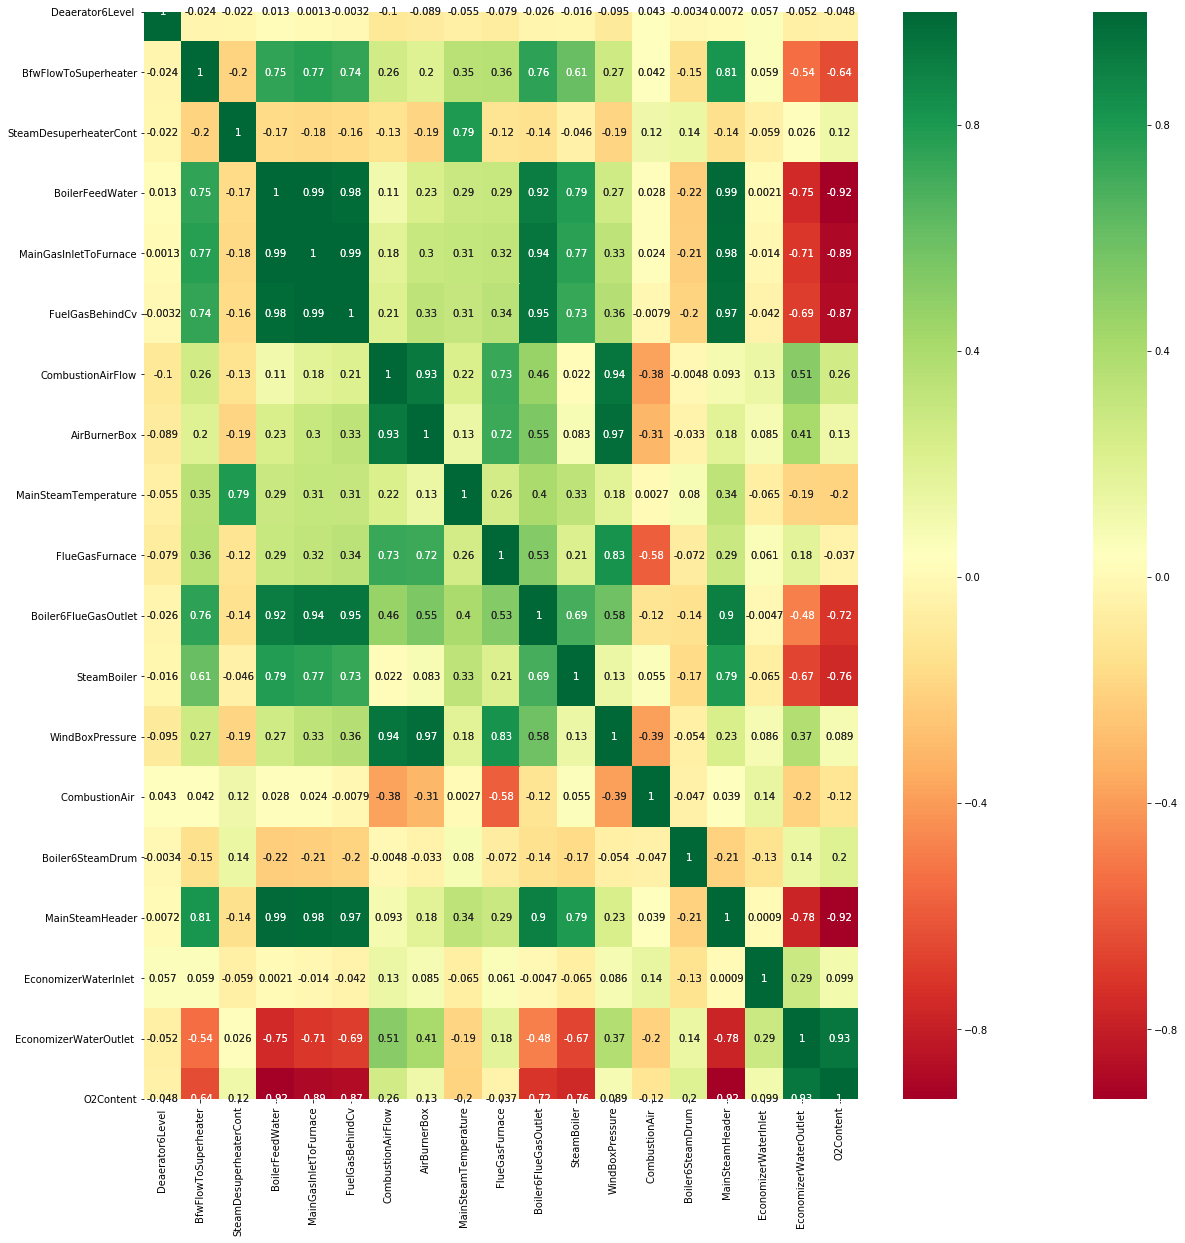

In [0]:
#Menampilkan hubungan korelasi antara fitur dengan target dalam bentuk heatmap
import seaborn as sns #mengimpor pustaka seaborn
import matplotlib.pyplot as plt #mengimpor pustaka matplotlib

top_corr_features = corrmat.index 
f=plt.figure(figsize=(20,20))
#Mem-plot heatmap dengan warna merah, kuning, hijau
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g=sns.heatmap(corrmat ,annot=True,cmap="RdYlGn")

In [0]:
#relevant_features["O2Content"]=data["O2Content"]
data=data[relevant_features.index] #fitur yang tidak lolos selsksi dihilangkan


In [0]:
data=data.drop(columns="BfwFlowToSuperheater")

KeyError: ignored

### Memisahkan data menjadi data latih dan data uji

In [0]:
train_data = data.sample(frac=0.8,random_state=0) #data latih sebanyak 80% dari total data
test_data = data.drop(train_data.index) #data uji sebanyak 20% dari total data

#### Melihat fungsi statistik data

In [0]:
train_stats = train_data.describe() #membangkitkan parameter statistik data
train_stats.pop("O2Content")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Deaerator6Level,4574.0,73.823342,4.332945,37.388476,73.806814,74.001281,74.220905,85.934159
BfwFlowToSuperheater,4574.0,2079.442999,819.975708,9.160979,1467.024072,2077.165814,2815.205406,4063.842443
SteamDesuperheaterCont,4574.0,384.490898,3.172218,369.187950,383.073657,384.746648,386.361461,414.152896
BoilerFeedWater,4574.0,65689.126655,6779.680094,40652.787690,60715.781750,63260.109110,72195.502063,82267.006840
MainGasInletToFurnace,4574.0,4497.034909,513.003656,2339.810902,4113.376328,4283.704408,4984.999214,5737.863396
FuelGasBehindCv,4574.0,0.179168,0.031998,0.072087,0.157457,0.165129,0.204438,0.265238
CombustionAirFlow,4574.0,98703.068051,4155.063834,87723.100020,96230.180318,98038.694465,101053.381550,111835.733700
AirBurnerBox,4574.0,239.049072,24.580412,139.275867,224.301053,236.361550,256.850939,304.392602
MainSteamTemperature,4574.0,464.567678,2.929709,447.381649,464.282865,464.981219,465.055122,478.622446
FlueGasFurnace,4574.0,140.030835,17.468713,75.278533,128.660003,141.629199,150.928677,186.912010


### Memisahkan label/target (O2 Content) dari data

In [0]:
train_labels = train_data.pop('O2Content') 
test_labels = test_data.pop('O2Content')

### Normalisasi data

In [0]:
def norm(x): #mendefinisikan fungsi normalisasi
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

### Perancangan model regresi

#### Model regresi dengan 1 hidden layer

In [0]:
def build_model(): #membangun model dengan 64 neuron pada hidden layer menggunakan fungsi aktivasi relu
  model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
    layers.Dense(104, activation=tf.nn.relu),
    layers.Dense(1)
  ]) 
  
  #Menentukan optimizer yang akan digunakan
  optimizer = keras.optimizers.SGD(lr=0.1)

  #Menentukan loss function dan menghitung error
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

#### Model regresi dengan 2 hidden layer

In [0]:
def build_model(): #membangun model dengan 64 neuron pada hidden layer menggunakan fungsi aktivasi relu
  model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),  
    layers.Dense(104, activation=tf.nn.relu),
    layers.Dense(1)
  ]) 
  
  #Menentukan optimizer yang akan digunakan
  optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

  #Menentukan loss function dan menghitung error
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

#### Model regresi dengan 3 hidden layer

In [0]:
def build_model(): #membangun model dengan 64 neuron pada hidden layer menggunakan fungsi aktivasi relu
  model = keras.Sequential([
    layers.Dense(100, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ]) 
  
  #Menentukan optimizer yang akan digunakan
  optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

  #Menentukan loss function dan menghitung error
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

### Pelatihan model regresi

In [0]:
model = build_model()

In [0]:
# Menampilkan progres pelatihan dengan titik-titik untuk setiap epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)    

EPOCHS = 1000

time_callback = TimeHistory()

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot(),time_callback])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
sum(time_callback.times)

376.201105594635

In [0]:
# Menampilkan nilai error selama pelatihan
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.002908,0.038457,0.002908,0.004151,0.045911,0.004151,995
996,0.002879,0.038239,0.002879,0.004244,0.046430,0.004244,996
997,0.002876,0.038335,0.002876,0.004480,0.048365,0.004480,997
998,0.002892,0.038461,0.002892,0.004072,0.045416,0.004072,998
999,0.002898,0.038347,0.002898,0.004327,0.047653,0.004327,999


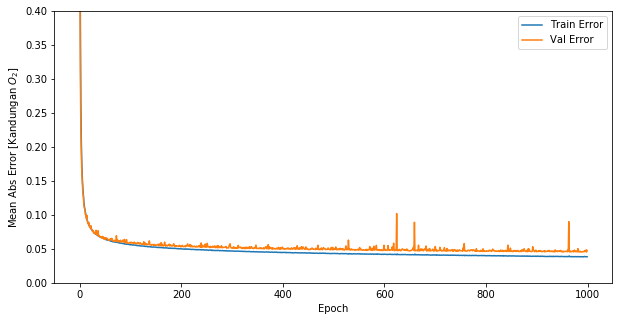

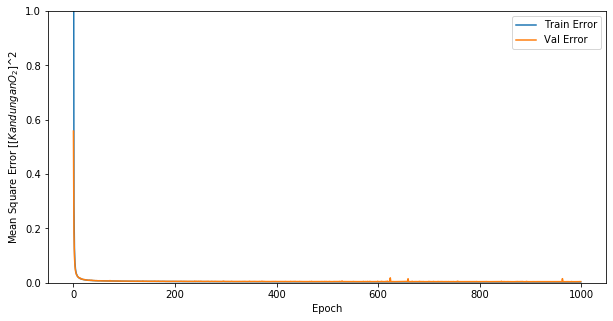

In [0]:
# Menampilkan grafik nilai error latih dan validasi terhadap jumlah epoch

import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(10,5))  
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Kandungan $O_2$]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,0.4])
  plt.legend()

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$[Kandungan O_2$]^2')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  
plt.show()
plot_history(history)


....................................................................................................
............................................

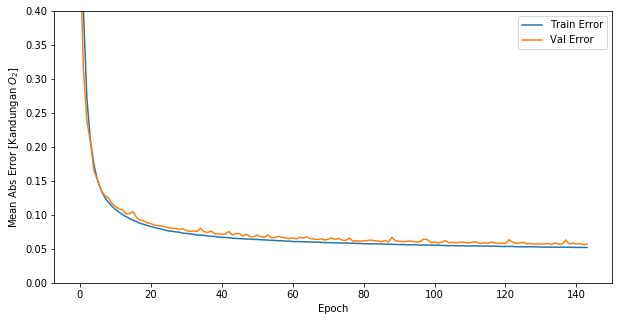

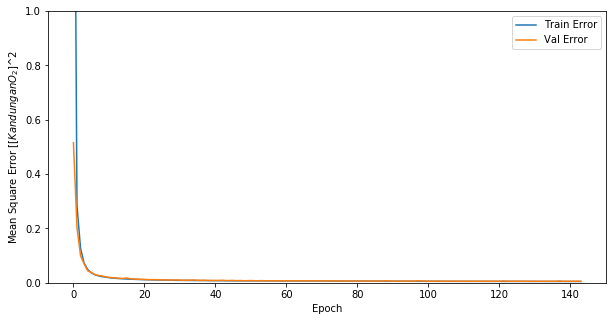

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

### Pengujian model regresi

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

#print(relevant_features)

print("Testing set Mean Abs Error: {:5.5f} O2Content".format(mae))
print("Testing set Mean Squared Error: {:5.5f} O2Content".format(mse))

mae

Testing set Mean Abs Error: 0.04390 O2Content
Testing set Mean Squared Error: 0.00352 O2Content


0.04389887

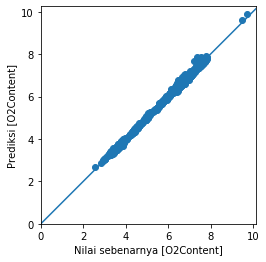

In [0]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('Nilai sebenarnya [O2Content]')
plt.ylabel('Prediksi [O2Content]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

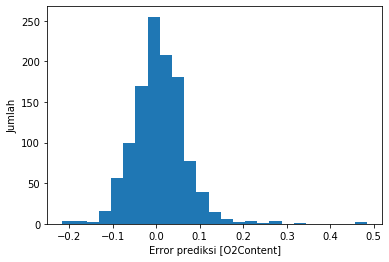

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Error prediksi [O2Content]")
_ = plt.ylabel("Jumlah")

In [0]:
def build_model(): #membangun model dengan 64 neuron pada hidden layer menggunakan fungsi aktivasi relu
  model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
    layers.Dense(104, activation=tf.nn.relu), 
    layers.Dense(1)
  ]) 
  
  #Menentukan optimizer yang akan digunakan
  optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=i, nesterov=True)

  #Menentukan loss function dan menghitung error
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
import time
  
class TimeHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.times = []

  def on_epoch_begin(self, batch, logs={}):
    self.epoch_time_start = time.time()
      
  def on_epoch_end(self, batch, logs={}):
    self.times.append(time.time() - self.epoch_time_start)

skor_mae=[]
waktu=[]
for i in (0.1,0.2,0.3,0.4,0.5,0.6,0.6,0.7,0.8,0.9,1):
  model = build_model()
  class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
      if epoch % 100 == 0: print('')
      print('.', end='')

  EPOCHS = 1000

  time_callback = TimeHistory()

  history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[time_callback])
  
  waktu.append(sum(time_callback.times))

  loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

  skor_mae.append(mae)
  
  print(skor_mae)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[0.050611403]
[0.050611403, 0.044995137]
[0.050611403, 0.044995137, 0.04567912]
[0.050611403, 0.044995137, 0.04567912, 0.047069743]
[0.050611403, 0.044995137, 0.04567912, 0.047069743, 0.042490948]
[0.050611403, 0.044995137, 0.04567912, 0.047069743, 0.042490948, 0.04464003]
[0.050611403, 0.044995137, 0.04567912, 0.047069743, 0.042490948, 0.04464003, 0.044521704]
[0.050611403, 0.044995137, 0.04567912, 0.047069743, 0.042490948, 0.04464003, 0.044521704, 0.043438837]
[0.050611403, 0.044995137, 0.04567912, 0.047069743, 0.042490948, 0.04464003, 0.044521704, 0.043438837, 0.052984588]
[0.050611403, 0.044995137, 0.04567912, 0.047069743, 0.042490948, 0.04464003, 0.044521704, 0.043438837, 0.052984588, 0.04276806]
[0.050611403, 0.044995137, 0.04567912, 0.047069743, 0.042490948, 0.04464003, 0.044521704, 0.043438837, 0.052984588, 0.04276806, 1.1812971]


In [0]:
[0.04835592, 0.04794819, 0.04882941, 0.049101345, 0.058511328, 0.04798571, 0.048744176, 0.050568156, 0.05060743, 0.0475972, 0.049106326, 0.04493205, 0.04669605, 0.04701273, 0.0486178, 0.049257834]

[0.04658356, 0.04953734]